# install all packages for regression

In [22]:
rm(list = ls())

#update packages
update.packages(ask = FALSE)

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

packages <- c('readr', 'haven', 'AER', 'stargazer')

ipak(packages)

readr     haven       AER stargazer 
     TRUE      TRUE      TRUE      TRUE

# load all packages for regression

In [23]:
rm(list = ls())

library(readr)
library(haven)
library(stargazer)

# check your current work directory

In [24]:
getwd()

[1] "/Users/ning/Downloads/Q2"

# load dataset

In [25]:
df <- read_dta("Q2.dta")

# check all observations

In [26]:
df

gpa,act
<dbl>,<dbl>
2.8,21
3.4,24
3.0,26
3.5,27
3.6,29
3.0,25
2.7,25
3.7,30


# computer summary statistics

In [27]:
summary(df)

      gpa             act       
 Min.   :2.700   Min.   :21.00  
 1st Qu.:2.950   1st Qu.:24.75  
 Median :3.200   Median :25.50  
 Mean   :3.212   Mean   :25.88  
 3rd Qu.:3.525   3rd Qu.:27.50  
 Max.   :3.700   Max.   :30.00  

In [28]:
min(df$act)
min(df$gpa)

[1] 21

[1] 2.7

In [29]:
max(df$act)
max(df$gpa)

[1] 30

[1] 3.7

In [30]:
mean(df$act)
mean(df$gpa)

[1] 25.875

[1] 3.2125

In [31]:
median(df$act)
median(df$gpa)

[1] 25.5

[1] 3.2

In [32]:
sd(df$act)
sd(df$gpa)

[1] 2.850439

[1] 0.3833592

# run OLS

In [33]:
OLS1 = lm(gpa ~ act , data=df)
summary(OLS1)


Call:
lm(formula = gpa ~ act, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42308 -0.14863  0.06703  0.10742  0.37912 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.56813    0.92842   0.612   0.5630  
act          0.10220    0.03569   2.863   0.0287 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2692 on 6 degrees of freedom
Multiple R-squared:  0.5774,	Adjusted R-squared:  0.507 
F-statistic: 8.199 on 1 and 6 DF,  p-value: 0.02868


# put it in a nice-looking table

In [34]:
stargazer(OLS1, type="text")


                        Dependent variable:    
                    ---------------------------
                                gpa            
-----------------------------------------------
act                           0.102**          
                              (0.036)          
                                               
Constant                       0.568           
                              (0.928)          
                                               
-----------------------------------------------
Observations                     8             
R2                             0.577           
Adjusted R2                    0.507           
Residual Std. Error       0.269 (df = 6)       
F Statistic             8.199** (df = 1; 6)    
Note:               *p<0.1; **p<0.05; ***p<0.01


# plot data and regression line

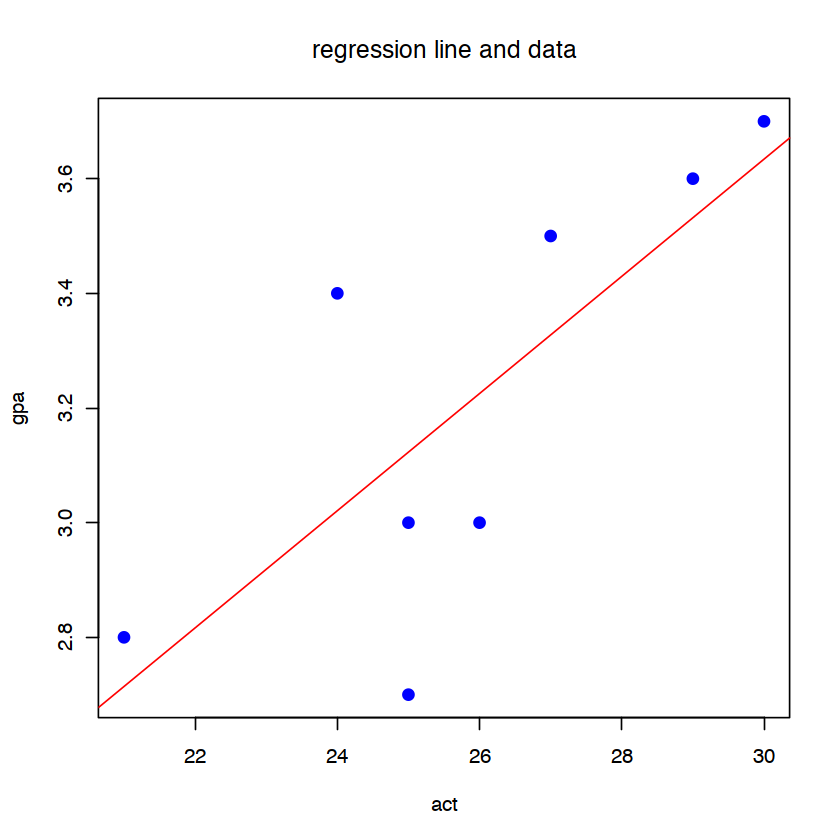

In [35]:
plot(df$act, df$gpa, pch = 16, cex = 1.3, col = "blue", xlab = "act", ylab = "gpa", main = "regression line and data")
abline(lm(gpa ~ act, data=df), col = "red")

# compute predicted gpa and predicted residual

In [36]:
df$Y_hat = predict(OLS1, df)

In [38]:
df$u_hat = df$gpa - df$Y_hat

In [39]:
df

gpa,act,Y_hat,u_hat
<dbl>,<dbl>,<dbl>,<dbl>
2.8,21,2.714286,0.08571422
3.4,24,3.020879,0.37912097
3.0,26,3.225275,-0.22527473
3.5,27,3.327473,0.17252747
3.6,29,3.531868,0.06813177
3.0,25,3.123077,-0.12307693
2.7,25,3.123077,-0.42307688
3.7,30,3.634066,0.06593411


# compute the mean of u hat, round to 4 decimal places

In [46]:
round( mean(df$u_hat), 4)

[1] 0

# predict for a given value of act

In [40]:
new_obs <- data.frame(act=20)

new_obs

act
<dbl>
20


In [42]:
new_obs$Y_hat = predict(OLS1, new_obs)

new_obs

act,Y_hat
<dbl>,<dbl>
20,2.612088


# How much of the variation in GPA for these eight students is explained by ACT?

## that's just R2

In [49]:
summary(OLS1)$r.squared 

[1] 0.5774238